## Set up environment paths

In [1]:
import setup

setup.main()

%load_ext autoreload
%autoreload 2

Working directory:  /Users/facosta/Desktop/code/neurometry/neurometry
Directory added to path:  /Users/facosta/Desktop/code/neurometry
Directory added to path:  /Users/facosta/Desktop/code/neurometry/neurometry


## Imports

In [2]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

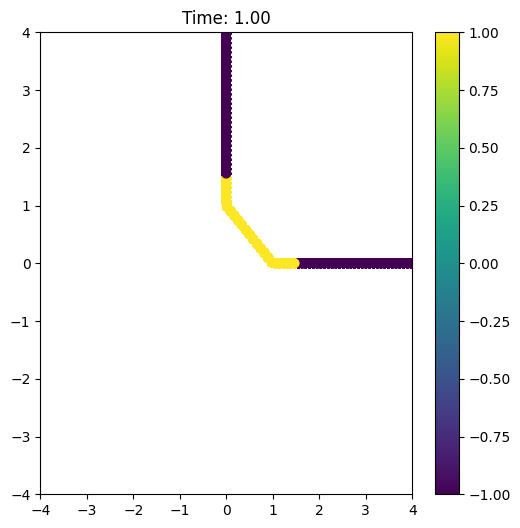

In [3]:
def f_a(x1, x2, a):
    # Combined transformation
    identity_x1 = x1
    identity_x2 = x2
    nand = -x1 - x2 + 0.5
    h1 = np.maximum(nand, 0)
    or_op = x1 + x2 + 0.5
    h2 = np.maximum(or_op, 0)

    # Linear interpolation
    h1_a = (1 - a) * identity_x1 + a * h1
    h2_a = (1 - a) * identity_x2 + a * h2
    return h1_a, h2_a


def g(h1, h2):
    return np.sign(-h1 - h2 + 1.5)


x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x1, x2)

h1, h2 = f_a(X1, X2, 1)
# Compute colors based on g
colors = g(h1, h2).ravel()

fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(X1, X2, c=colors, cmap="viridis")
fig.colorbar(scatter, ax=ax)


def update(a):
    H1, H2 = f_a(X1, X2, a)
    scatter.set_offsets(np.column_stack([H1.ravel(), H2.ravel()]))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_title(f"Time: {a:.2f}")
    return (scatter,)


ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 1, 50), blit=True)

HTML(ani.to_jshtml())